In [9]:
import pandas as pd
import os
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder, MinMaxScaler, Normalizer
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.neural_network import MLPRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.svm import SVR
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout
from tensorflow import keras
from tensorflow.keras import layers
import joblib
import matplotlib.pyplot as plt
from sklearn.ensemble import IsolationForest
from sklearn.svm import OneClassSVM
from sklearn.cluster import DBSCAN
from collections import Counter
from sklearn.linear_model import LinearRegression

In [14]:
# Set the folder path
folder_path = 'ECE657_dataset'

# Read the generation data for Plant 1 and Plant 2
generation_file_plant1 = 'Plant_1_Generation_Data.csv'
generation_file_plant2 = 'Plant_2_Generation_Data.csv'

generation_path_plant1 = os.path.join(folder_path, generation_file_plant1)
generation_path_plant2 = os.path.join(folder_path, generation_file_plant2)

try:
    plant_1_gen = pd.read_csv(generation_path_plant1)
    print("Successfully loaded Plant 1 generation data.")
except FileNotFoundError:
    print("Could not find Plant 1 generation data file.")
    exit()

try:
    plant_2_gen = pd.read_csv(generation_path_plant2)
    print("Successfully loaded Plant 2 generation data.")
except FileNotFoundError:
    print("Could not find Plant 2 generation data file.")
    exit()

# Preprocess timestamp
plant_1_gen['DATE_TIME'] = pd.to_datetime(plant_1_gen['DATE_TIME'])
plant_2_gen['DATE_TIME'] = pd.to_datetime(plant_2_gen['DATE_TIME'])

print("\n--- Plant 1 Generation Data Analysis ---")
print(f"Time Range:")
print(f"  Start Time: {plant_1_gen['DATE_TIME'].min()}")
print(f"  End Time: {plant_1_gen['DATE_TIME'].max()}")
num_inverters_plant1 = plant_1_gen['SOURCE_KEY'].nunique()
print(f"Number of Unique Inverters: {num_inverters_plant1}")

print("\n--- Plant 2 Generation Data Analysis ---")
print(f"Time Range:")
print(f"  Start Time: {plant_2_gen['DATE_TIME'].min()}")
print(f"  End Time: {plant_2_gen['DATE_TIME'].max()}")
num_inverters_plant2 = plant_2_gen['SOURCE_KEY'].nunique()
print(f"Number of Unique Inverters: {num_inverters_plant2}")

成功載入 Plant 1 發電資料。
成功載入 Plant 2 發電資料。

--- Plant 1 發電資料分析 ---
時間範圍:
  開始時間: 2020-01-06 00:00:00
  結束時間: 2020-12-06 23:45:00
獨立 Inverter 數量: 22

--- Plant 2 發電資料分析 ---
時間範圍:
  開始時間: 2020-05-15 00:00:00
  結束時間: 2020-06-17 23:45:00
獨立 Inverter 數量: 22


In [16]:
# Set the folder path
folder_path = 'ECE657_dataset'

# Read the weather sensor data for Plant 1 and Plant 2
sensor_file_plant1 = 'Plant_1_Weather_Sensor_Data.csv'
sensor_file_plant2 = 'Plant_2_Weather_Sensor_Data.csv'

sensor_path_plant1 = os.path.join(folder_path, sensor_file_plant1)
sensor_path_plant2 = os.path.join(folder_path, sensor_file_plant2)

try:
    plant_1_sen = pd.read_csv(sensor_path_plant1)
    print("Successfully loaded Plant 1 weather sensor data.")
except FileNotFoundError:
    print("Could not find Plant 1 weather sensor data file.")
    exit()

try:
    plant_2_sen = pd.read_csv(sensor_path_plant2)
    print("Successfully loaded Plant 2 weather sensor data.")
except FileNotFoundError:
    print("Could not find Plant 2 weather sensor data file.")
    exit()

# Preprocess timestamp
plant_1_sen['DATE_TIME'] = pd.to_datetime(plant_1_sen['DATE_TIME'])
plant_2_sen['DATE_TIME'] = pd.to_datetime(plant_2_sen['DATE_TIME'])

print("\n--- Plant 1 Weather Sensor Data Analysis ---")
print(f"Time Range:")
print(f"  Start Time: {plant_1_sen['DATE_TIME'].min()}")
print(f"  End Time: {plant_1_sen['DATE_TIME'].max()}")

print("\n--- Plant 2 Weather Sensor Data Analysis ---")
print(f"Time Range:")
print(f"  Start Time: {plant_2_sen['DATE_TIME'].min()}")
print(f"  End Time: {plant_2_sen['DATE_TIME'].max()}")

成功載入 Plant 1 天氣感測器資料。
成功載入 Plant 2 天氣感測器資料。

--- Plant 1 天氣感測器資料分析 ---
時間範圍:
  開始時間: 2020-05-15 00:00:00
  結束時間: 2020-06-17 23:45:00

--- Plant 2 天氣感測器資料分析 ---
時間範圍:
  開始時間: 2020-05-15 00:00:00
  結束時間: 2020-06-17 23:45:00


In [ ]:
import pandas as pd
import os

# Set the folder path (modify according to your actual path)
folder_path = 'ECE657_dataset'

# Read generation data for Plant 1
generation_file_plant1 = 'Plant_1_Generation_Data.csv'
generation_path_plant1 = os.path.join(folder_path, generation_file_plant1)

try:
    plant_1_generation = pd.read_csv(generation_path_plant1)
    plant_1_generation['DATE_TIME'] = pd.to_datetime(plant_1_generation['DATE_TIME'])
    print(f"Successfully loaded and converted timestamps for {generation_file_plant1}.")
except FileNotFoundError:
    print(f"Error: Could not find {generation_file_plant1}. Please ensure the file path is correct.")
    exit()

# Read generation data for Plant 2
generation_file_plant2 = 'Plant_2_Generation_Data.csv'
generation_path_plant2 = os.path.join(folder_path, generation_file_plant2)

try:
    plant_2_generation = pd.read_csv(generation_path_plant2)
    plant_2_generation['DATE_TIME'] = pd.to_datetime(plant_2_generation['DATE_TIME'])
    print(f"Successfully loaded and converted timestamps for {generation_file_plant2}.")
except FileNotFoundError:
    print(f"Error: Could not find {generation_file_plant2}. Please ensure the file path is correct.")
    exit()

# Find the timestamp range for Plant 1 and Plant 2
plant_1_start_time = plant_1_generation['DATE_TIME'].min()
plant_1_end_time = plant_1_generation['DATE_TIME'].max()
plant_2_start_time = plant_2_generation['DATE_TIME'].min()
plant_2_end_time = plant_2_generation['DATE_TIME'].max()

print(f"\nTime range for Plant 1: From {plant_1_start_time} to {plant_1_end_time}")
print(f"Time range for Plant 2: From {plant_2_start_time} to {plant_2_end_time}")

# Check if the time ranges overlap
if plant_1_start_time <= plant_2_end_time and plant_2_start_time <= plant_1_end_time:
    # Find the overlapping time period
    overlap_start = max(plant_1_start_time, plant_2_start_time)
    overlap_end = min(plant_1_end_time, plant_2_end_time)
    print(f"\nPlant 1 and Plant 2 data have a time overlap, the overlapping range is from {overlap_start} to {overlap_end}.")

    # You can further check if there are specific identical timestamps within the overlap
    # This step might be time-consuming if the data volume is large
    if (overlap_end - overlap_start).total_seconds() > 0:
        plant_1_overlap_times = set(plant_1_generation[(plant_1_generation['DATE_TIME'] >= overlap_start) & (plant_1_generation['DATE_TIME'] <= overlap_end)]['DATE_TIME'])
        plant_2_overlap_times = set(plant_2_generation[(plant_2_generation['DATE_TIME'] >= overlap_start) & (plant_2_generation['DATE_TIME'] <= overlap_end)]['DATE_TIME'])
        common_times = plant_1_overlap_times & plant_2_overlap_times

        if common_times:
            print(f"\nWithin the overlapping time range, there are {len(common_times)} common timestamps.")
            # If you want to see the specific timestamps, uncomment the lines below, but it might flood the console if the number is large
            # print("\nExamples of common timestamps:")
            # print(list(common_times)[:10]) # Show the first 10 common timestamps
        else:
            print("\nWithin the overlapping time range, although the time periods overlap, there are no exact identical timestamps.")
    else:
        print("\nThe overlapping time range is very short or there are no precise overlapping time points.")

else:
    print("\nPlant 1 and Plant 2 data do not have a time overlap.")

In [ ]:
# Set the folder path
folder_path = 'ECE657_dataset'

# Initialize two dictionaries to store data
plant_1_data = {}
plant_2_data = {}

# Read Plant 1 data
generation_file_plant1 = 'Plant_1_Generation_Data.csv'
sensor_file_plant1 = 'Plant_1_Weather_Sensor_Data.csv'

generation_path_plant1 = os.path.join(folder_path, generation_file_plant1)
sensor_path_plant1 = os.path.join(folder_path, sensor_file_plant1)

try:
    plant_1_data['generation'] = pd.read_csv(generation_path_plant1)
    plant_1_data['sensor'] = pd.read_csv(sensor_path_plant1)
    print(f"Successfully loaded {generation_file_plant1} and {sensor_file_plant1}.")
except FileNotFoundError:
    print(f"Error: Could not find {generation_file_plant1} or {sensor_file_plant1}. Please ensure the file path is correct.")

# Read Plant 2 data
generation_file_plant2 = 'Plant_2_Generation_Data.csv'
sensor_file_plant2 = 'Plant_2_Weather_Sensor_Data.csv'

generation_path_plant2 = os.path.join(folder_path, generation_file_plant2)
sensor_path_plant2 = os.path.join(folder_path, sensor_file_plant2)

try:
    plant_2_data['generation'] = pd.read_csv(generation_path_plant2)
    plant_2_data['sensor'] = pd.read_csv(sensor_path_plant2)
    print(f"Successfully loaded {generation_file_plant2} and {sensor_file_plant2}.")
except FileNotFoundError:
    print(f"Error: Could not find {generation_file_plant2} or {sensor_file_plant2}. Please ensure the file path is correct.")

# Merge Plant 1 generation and sensor data (using only TIMESTAMP and PLANT_ID)
if plant_1_data and 'generation' in plant_1_data and 'sensor' in plant_1_data:
    plant_1_generation = plant_1_data['generation'].rename(columns={'DATE_TIME': 'TIMESTAMP', 'SOURCE_KEY': 'INVERTER_KEY'}) # More explicit naming
    plant_1_sensor = plant_1_data['sensor'].rename(columns={'DATE_TIME': 'TIMESTAMP', 'SOURCE_KEY': 'WEATHER_KEY'}) # More explicit naming
    plant_1_generation['TIMESTAMP'] = pd.to_datetime(plant_1_generation['TIMESTAMP'])
    plant_1_sensor['TIMESTAMP'] = pd.to_datetime(plant_1_sensor['TIMESTAMP'])
    merged_data_p1 = pd.merge(plant_1_generation, plant_1_sensor, on=['TIMESTAMP', 'PLANT_ID'], how='inner')
    print(f"Size of merged Plant 1 data: {merged_data_p1.shape}")
else:
    merged_data_p1 = pd.DataFrame()
    print("Plant 1 data not loaded successfully, cannot merge.")

# Merge Plant 2 generation and sensor data (using only TIMESTAMP and PLANT_ID)
if plant_2_data and 'generation' in plant_2_data and 'sensor' in plant_2_data:
    plant_2_generation = plant_2_data['generation'].rename(columns={'DATE_TIME': 'TIMESTAMP', 'SOURCE_KEY': 'INVERTER_KEY'}) # More explicit naming
    plant_2_sensor = plant_2_data['sensor'].rename(columns={'DATE_TIME': 'TIMESTAMP', 'SOURCE_KEY': 'WEATHER_KEY'}) # More explicit naming
    plant_2_generation['TIMESTAMP'] = pd.to_datetime(plant_2_generation['TIMESTAMP'])
    plant_2_sensor['TIMESTAMP'] = pd.to_datetime(plant_2_sensor['TIMESTAMP'])
    merged_data_p2 = pd.merge(plant_2_generation, plant_2_sensor, on=['TIMESTAMP', 'PLANT_ID'], how='inner')
    print(f"Size of merged Plant 2 data: {merged_data_p2.shape}")
else:
    merged_data_p2 = pd.DataFrame()
    print("Plant 2 data not loaded successfully, cannot merge.")

# Merge merged data of Plant 1 and Plant 2
if not merged_data_p1.empty and not merged_data_p2.empty:
    merged_data = pd.concat([merged_data_p1, merged_data_p2], ignore_index=True)
    merged_data = merged_data.sort_values(by=['INVERTER_KEY', 'TIMESTAMP']) # Sort by INVERTER_KEY and TIMESTAMP
    merged_data['hour'] = merged_data['TIMESTAMP'].dt.hour
    merged_data['dayofweek'] = merged_data['TIMESTAMP'].dt.dayofweek
    merged_data['dayofyear'] = merged_data['TIMESTAMP'].dt.dayofyear

    def create_lagged_features(df, lag_steps=1):
        df['prev_ac_power'] = df.groupby('INVERTER_KEY')['AC_POWER'].shift(lag_steps) # Group by INVERTER_KEY
        df['prev_dc_power'] = df.groupby('INVERTER_KEY')['DC_POWER'].shift(lag_steps) # Group by INVERTER_KEY
        return df

    merged_data = create_lagged_features(merged_data.copy())
    merged_data = merged_data.dropna()
else:
    merged_data = pd.DataFrame()
    print("Could not merge data for Plant 1 and Plant 2.")

# Select inverter keys to isolate
selected_inverter_keys = ['1BY6WEcLGh8j5v7', 'bvBOhCH3iADSZry', 'McdE0feGgRqW7Ca', 'wCURE6d3bPkepu2']

# Put the data of the selected inverters into selected_inverter_data
selected_inverter_data = merged_data[merged_data['INVERTER_KEY'].isin(selected_inverter_keys)].copy()
print(f"\nSize of selected inverter data: {selected_inverter_data.shape}")
print("\nFirst few rows of selected inverter data:")
print(selected_inverter_data.head())

# Put the data of the remaining inverters into remaining_inverter_data
remaining_inverter_data = merged_data[~merged_data['INVERTER_KEY'].isin(selected_inverter_keys)].copy()
print(f"\nSize of remaining inverter data: {remaining_inverter_data.shape}")
print("\nFirst few rows of remaining inverter data:")
print(remaining_inverter_data.head())

train_data_list = []
test_data_list = []

if not remaining_inverter_data.empty: # Use remaining_inverter_data for train and test split
    grouped = remaining_inverter_data.groupby('INVERTER_KEY')
    for key, group in grouped:
        n_samples = len(group)
        train_size = int(0.8 * n_samples)
        train_data_list.append(group[:train_size])
        test_data_list.append(group[train_size:])

    train_data_all = pd.concat(train_data_list, ignore_index=True)
    test_data_all = pd.concat(test_data_list, ignore_index=True)

    # Define feature types
    numerical_features = ['AMBIENT_TEMPERATURE', 'MODULE_TEMPERATURE', 'IRRADIATION', 'prev_dc_power', 'prev_ac_power']
    categorical_feature = ['INVERTER_KEY']
    time_features = ['hour', 'dayofweek', 'dayofyear']
    target_features = ['DC_POWER', 'AC_POWER']
    other_features_to_drop = ['TIMESTAMP', 'PLANT_ID', 'DAILY_YIELD', 'TOTAL_YIELD', 'WEATHER_KEY']

    # Separate features
    train_numerical = train_data_all[numerical_features].copy()
    test_numerical = test_data_all[numerical_features].copy()
    train_categorical = train_data_all[categorical_feature].copy()
    test_categorical = test_data_all[categorical_feature].copy()
    train_time = train_data_all[time_features].copy()
    test_time = test_data_all[time_features].copy()
    print("\nTraining set numerical feature columns:", train_numerical.columns)
    print("\nTest set numerical feature columns:", test_numerical.columns)

    # Initialize MinMaxScaler
    temp_scaler = MinMaxScaler()
    irr_scaler = MinMaxScaler()
    dc_power_scaler = MinMaxScaler()
    ac_power_scaler = MinMaxScaler()

    # Fit scaler on training data and transform training and test sets
    train_numerical[numerical_features[:2]] = temp_scaler.fit_transform(train_numerical[numerical_features[:2]])
    test_numerical[numerical_features[:2]] = temp_scaler.transform(test_numerical[numerical_features[:2]])

    train_numerical[['IRRADIATION']] = irr_scaler.fit_transform(train_numerical[['IRRADIATION']])
    test_numerical[['IRRADIATION']] = irr_scaler.transform(test_numerical[['IRRADIATION']])

    train_numerical[['prev_dc_power']] = dc_power_scaler.fit_transform(train_numerical[['prev_dc_power']])
    test_numerical[['prev_dc_power']] = dc_power_scaler.transform(test_numerical[['prev_dc_power']])

    train_numerical[['prev_ac_power']] = ac_power_scaler.fit_transform(train_numerical[['prev_ac_power']])
    test_numerical[['prev_ac_power']] = ac_power_scaler.transform(test_numerical[['prev_ac_power']])

    # Set the path to save the files
    temp_scaler_path = os.path.join(folder_path, 'temp_scaler.joblib')
    irr_scaler_path = os.path.join(folder_path, 'irr_scaler.joblib')
    dc_power_scaler_path = os.path.join(folder_path, 'dc_power_scaler.joblib')
    ac_power_scaler_path = os.path.join(folder_path, 'ac_power_scaler.joblib')

    # Save scalers
    joblib.dump(temp_scaler, temp_scaler_path)
    print(f"temp_scaler saved to: {temp_scaler_path}")

    joblib.dump(irr_scaler, irr_scaler_path)
    print(f"irr_scaler saved to: {irr_scaler_path}")

    joblib.dump(dc_power_scaler, dc_power_scaler_path)
    print(f"dc_power_scaler saved to: {dc_power_scaler_path}")

    joblib.dump(ac_power_scaler, ac_power_scaler_path)
    print(f"ac_power_scaler saved to: {ac_power_scaler_path}")

    print("\nAll scalers saved successfully.")

    # Perform One-Hot Encoding
    encoder = OneHotEncoder(handle_unknown='ignore')
    X_train_encoded = encoder.fit_transform(train_categorical).toarray()
    X_test_encoded = encoder.transform(test_categorical).toarray()
    encoder_path = os.path.join(folder_path, 'onehot_encoder.joblib')
    joblib.dump(encoder, encoder_path)
    print(f"onehot_encoder saved to: {encoder_path}")

    encoded_feature_names = [f'INVERTER_KEY_{cat}' for cat in encoder.categories_[0]]

    X_train_encoded_df = pd.DataFrame(X_train_encoded, index=train_categorical.index, columns=encoded_feature_names)
    X_test_encoded_df = pd.DataFrame(X_test_encoded, index=test_categorical.index, columns=encoded_feature_names)

    # Concatenate features
    X_train_scaled = pd.concat([train_numerical.reset_index(drop=True), X_train_encoded_df.reset_index(drop=True), train_time.reset_index(drop=True)], axis=1)
    X_test_scaled = pd.concat([test_numerical.reset_index(drop=True), X_test_encoded_df.reset_index(drop=True), test_time.reset_index(drop=True)], axis=1)

    # Prepare X and y for predicting DC_POWER and AC_POWER separately
    def prepare_data_scaled(X, df, target_column): # Added scaler as an argument
        y = df[target_column].copy()
        return X, y

    X_train_dc_scaled, y_train_dc = prepare_data_scaled(X_train_scaled.copy(), train_data_all, 'DC_POWER')
    X_test_dc_scaled, y_test_dc = prepare_data_scaled(X_test_scaled.copy(), test_data_all, 'DC_POWER')

    X_train_ac_scaled, y_train_ac = prepare_data_scaled(X_train_scaled.copy(), train_data_all, 'AC_POWER')
    X_test_ac_scaled, y_test_ac = prepare_data_scaled(X_test_scaled.copy(), test_data_all, 'AC_POWER')

    print("\nFirst few rows of scaled and One-Hot encoded training features (DC_POWER):")
    print(X_train_dc_scaled.head())
    print("\nFirst few rows of training target variable (DC_POWER):")
    print(y_train_dc.head())
    print("\nFirst few rows of scaled and One-Hot encoded test features (DC_POWER):")
    print(X_test_dc_scaled.head())
    print("\nFirst few rows of test target variable (DC_POWER):")
    print(y_test_dc.head())

    print("\nFirst few rows of scaled and One-Hot encoded training features (AC_POWER):")
    print(X_train_ac_scaled.head())
    print("\nFirst few rows of test target variable (AC_POWER):")
    print(X_test_ac_scaled.head())
else:
    print("Cannot perform train-test split as the merged data for remaining inverters is empty.")

In [ ]:
# Set the folder path
folder_path = 'ECE657_dataset'

# Read generation and sensor data for Plant 1 and Plant 2
generation_file_plant1 = 'Plant_1_Generation_Data.csv'
sensor_file_plant1 = 'Plant_1_Weather_Sensor_Data.csv'
generation_file_plant2 = 'Plant_2_Generation_Data.csv'
sensor_file_plant2 = 'Plant_2_Weather_Sensor_Data.csv'

generation_path_plant1 = os.path.join(folder_path, generation_file_plant1)
sensor_path_plant1 = os.path.join(folder_path, sensor_file_plant1)
generation_path_plant2 = os.path.join(folder_path, generation_file_plant2)
sensor_path_plant2 = os.path.join(folder_path, sensor_file_plant2)

try:
    plant_1_gen = pd.read_csv(generation_path_plant1)
    plant_1_sen = pd.read_csv(sensor_path_plant1)
    print("Successfully loaded Plant 1 data.")
except FileNotFoundError:
    print("Could not find Plant 1 data files.")
    exit()

try:
    plant_2_gen = pd.read_csv(generation_path_plant2)
    plant_2_sen = pd.read_csv(sensor_path_plant2)
    print("Successfully loaded Plant 2 data.")
except FileNotFoundError:
    print("Could not find Plant 2 data files.")
    exit()

# Preprocess timestamps
plant_1_gen['DATE_TIME'] = pd.to_datetime(plant_1_gen['DATE_TIME'])
plant_1_sen['DATE_TIME'] = pd.to_datetime(plant_1_sen['DATE_TIME'])
plant_2_gen['DATE_TIME'] = pd.to_datetime(plant_2_gen['DATE_TIME'])
plant_2_sen['DATE_TIME'] = pd.to_datetime(plant_2_sen['DATE_TIME'])

# Merge Plant 1 data
merged_plant1 = pd.merge(plant_1_gen, plant_1_sen, on=['DATE_TIME', 'PLANT_ID'], how='inner')
merged_plant1 = merged_plant1.rename(columns={'SOURCE_KEY_x': 'INVERTER_KEY', 'SOURCE_KEY_y': 'WEATHER_KEY'})

# Merge Plant 2 data
merged_plant2 = pd.merge(plant_2_gen, plant_2_sen, on=['DATE_TIME', 'PLANT_ID'], how='inner')
merged_plant2 = merged_plant2.rename(columns={'SOURCE_KEY_x': 'INVERTER_KEY', 'SOURCE_KEY_y': 'WEATHER_KEY'})

# --- Modified DBSCAN Anomaly Detection Function ---
def detect_irradiation_ac_anomaly_dbscan_modified(df, plant_name, eps=0.15, min_samples=3):
    """
    Detects anomalies based on the relationship between Irradiation and AC Power using a modified DBSCAN model,
    treating points outside the largest cluster as anomalies.
    """
    df_copy = df.copy()
    df_copy = df_copy.sort_values(by='DATE_TIME')
    df_copy['is_irradiation_ac_anomaly_dbscan_modified'] = False
    anomaly_indices = []

    # Remove data points where Irradiation is 0
    df_filtered = df_copy[df_copy['IRRADIATION'] > 0].copy()

    if df_filtered.empty:
        print(f"{plant_name}: No data with Irradiation greater than 0, cannot perform anomaly detection.")
        return df_copy

    for inverter_key in df_filtered['INVERTER_KEY'].unique():
        inverter_data = df_filtered[df_filtered['INVERTER_KEY'] == inverter_key].copy()

        # Standardize features using StandardScaler
        scaler = StandardScaler()
        features_scaled = scaler.fit_transform(inverter_data[['IRRADIATION', 'AC_POWER']])

        # Train DBSCAN model
        dbscan = DBSCAN(eps=eps, min_samples=min_samples)
        clusters = dbscan.fit_predict(features_scaled)

        # Find the largest cluster (ignore noise points -1)
        cluster_counts = Counter(c for c in clusters if c != -1)
        if cluster_counts:
            largest_cluster = max(cluster_counts, key=cluster_counts.get)
        else:
            largest_cluster = -2  # If no clusters are formed (other than noise)

        # Mark points not belonging to the largest cluster as anomalies
        anomaly_points_indices = inverter_data[clusters != largest_cluster].index.tolist()
        df_copy.loc[anomaly_points_indices, 'is_irradiation_ac_anomaly_dbscan_modified'] = True

        # Visualize results for each Inverter
        plt.figure(figsize=(12, 6))
        normal_data = inverter_data[clusters == largest_cluster]
        anomaly_data = inverter_data[clusters != largest_cluster]
        noise_data = inverter_data[clusters == -1] # Mark noise points separately

        plt.scatter(normal_data['IRRADIATION'], normal_data['AC_POWER'], label=f'Largest Cluster (Cluster {largest_cluster})', s=10)
        plt.scatter(anomaly_data['IRRADIATION'], anomaly_data['AC_POWER'], color='red', label='Anomalies (Not Largest Cluster)', s=30)
        plt.scatter(noise_data['IRRADIATION'], noise_data['AC_POWER'], color='gray', label='Noise Points (DBSCAN)', s=30, marker='x')
        plt.title(f'{plant_name} - Inverter {inverter_key}: Irradiation vs AC Power (Modified DBSCAN)')
        plt.xlabel('Irradiation')
        plt.ylabel('AC Power')
        plt.legend()
        plt.grid(True)
        plt.tight_layout()
        plt.show()

    print(f"\n{plant_name}: Anomaly detection based on Irradiation and AC Power using modified DBSCAN completed.")
    print(f"{plant_name}: Number of data points marked as anomalies (not in the largest cluster): {df_copy['is_irradiation_ac_anomaly_dbscan_modified'].sum()}")

    return df_copy

# Perform modified anomaly detection for Plant 1 and Plant 2
# You can try adjusting the values of eps and min_samples
merged_plant1_anomalies_dbscan_modified = detect_irradiation_ac_anomaly_dbscan_modified(merged_plant1, 'Plant 1', eps=0.1, min_samples=3)
merged_plant2_anomalies_dbscan_modified = detect_irradiation_ac_anomaly_dbscan_modified(merged_plant2, 'Plant 2', eps=0.1, min_samples=3)

# You can now view the 'is_irradiation_ac_anomaly_dbscan_modified' column in the merged_plant1_anomalies_dbscan_modified and merged_plant2_anomalies_dbscan_modified DataFrames
# True indicates that the data point was marked as an anomaly (not belonging to the largest cluster)
print("\nFirst few rows of Plant 1 data marked as anomalies using modified DBSCAN:")
print(merged_plant1_anomalies_dbscan_modified[merged_plant1_anomalies_dbscan_modified['is_irradiation_ac_anomaly_dbscan_modified']].head())

print("\nFirst few rows of Plant 2 data marked as anomalies using modified DBSCAN:")
print(merged_plant2_anomalies_dbscan_modified[merged_plant2_anomalies_dbscan_modified['is_irradiation_ac_anomaly_dbscan_modified']].head())

成功載入 Plant 1 資料。
成功載入 Plant 2 資料。


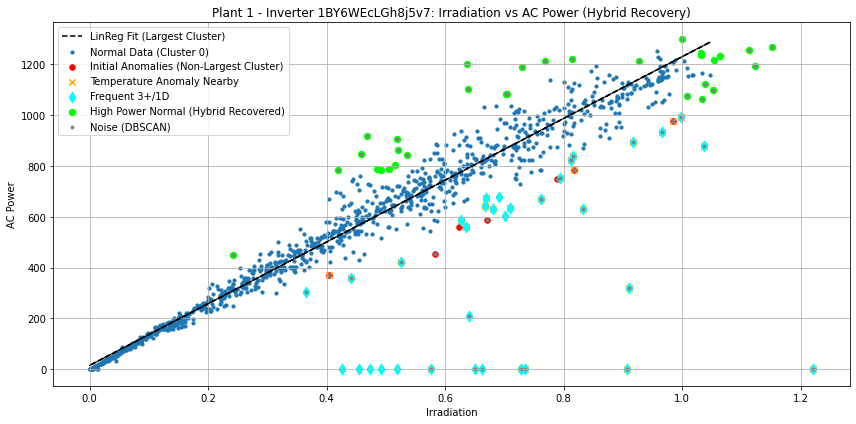

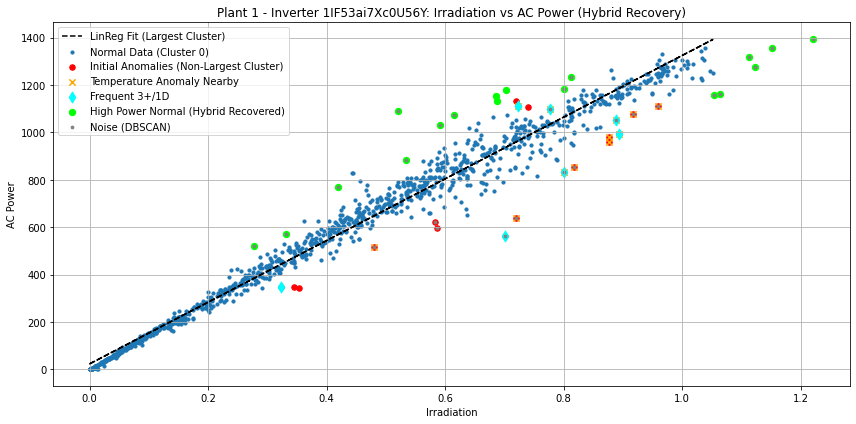

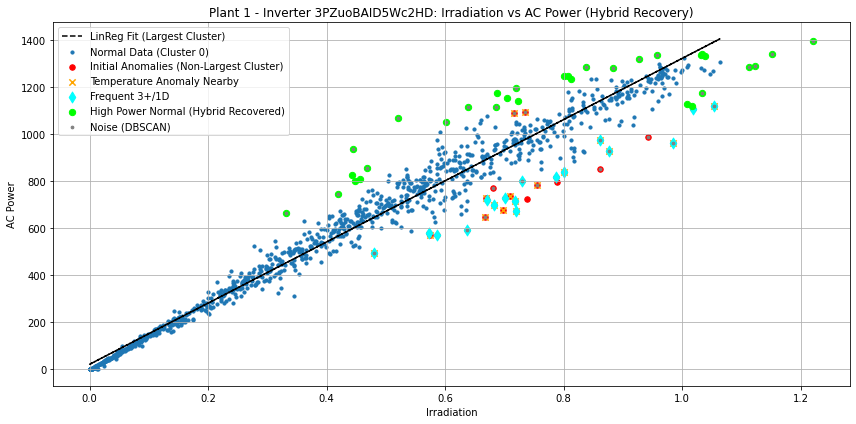

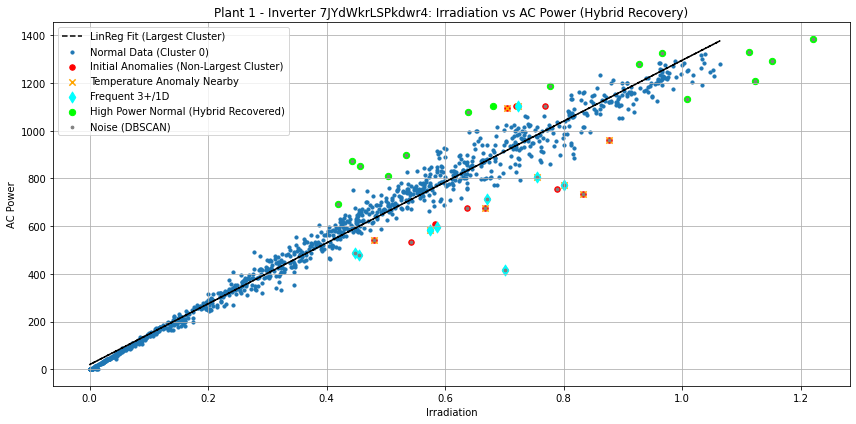

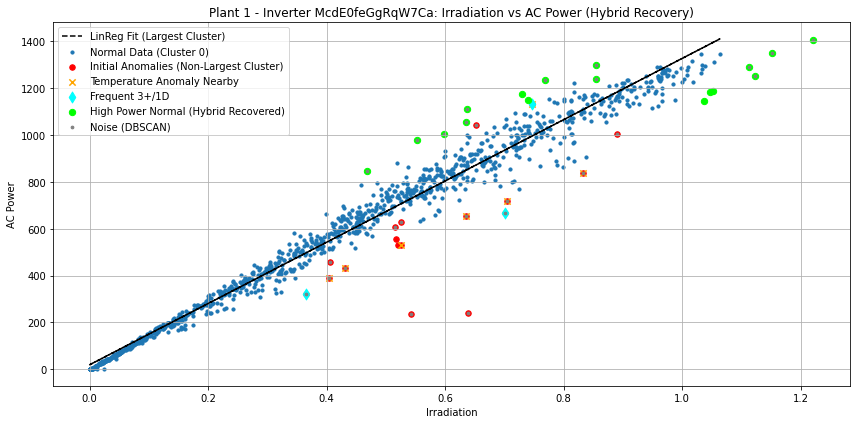

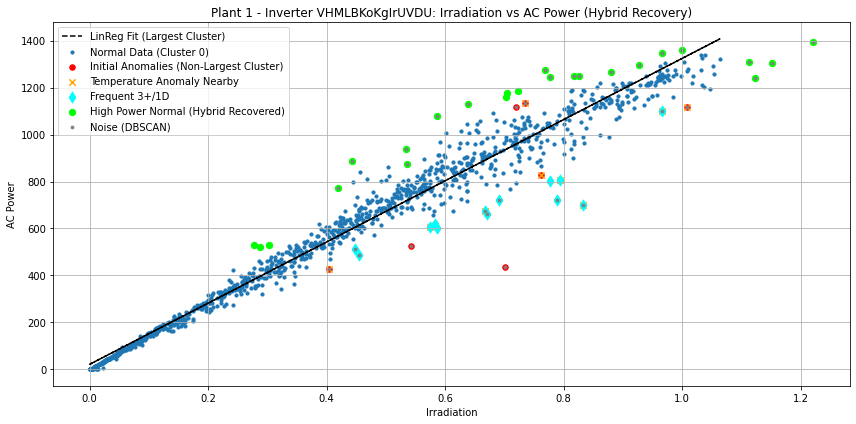

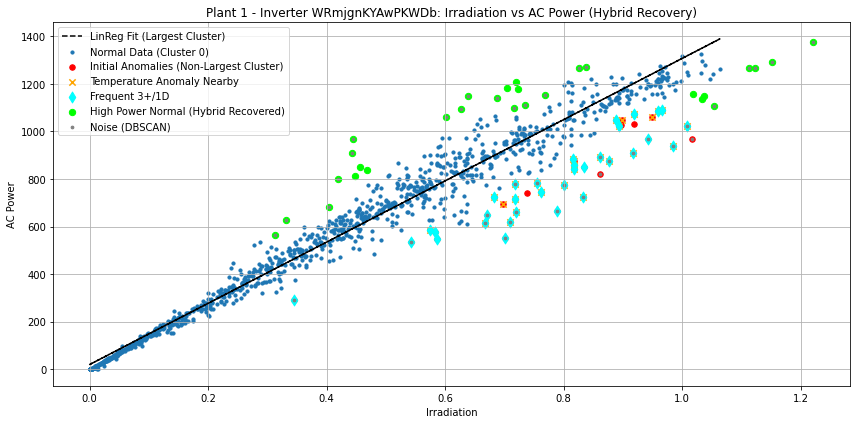

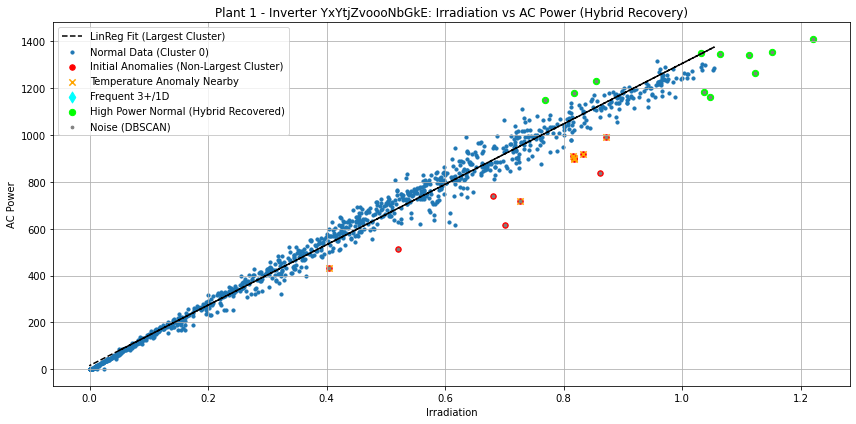

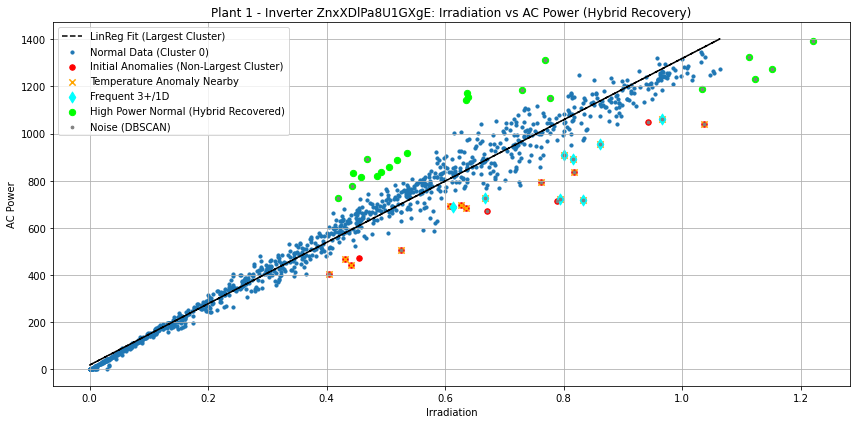

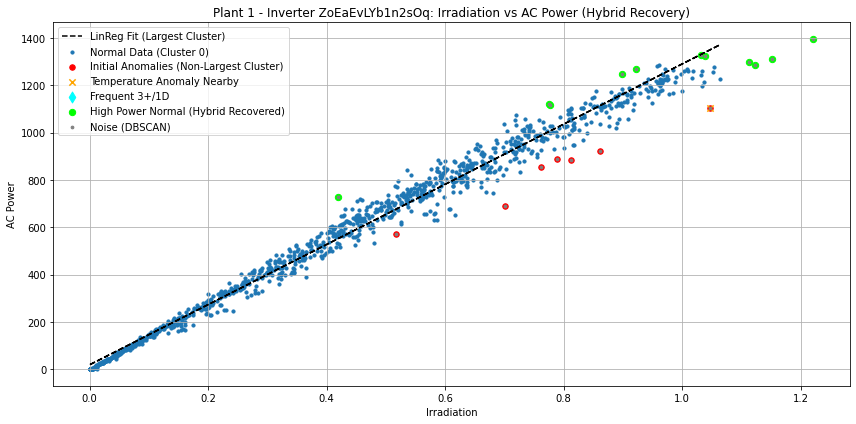

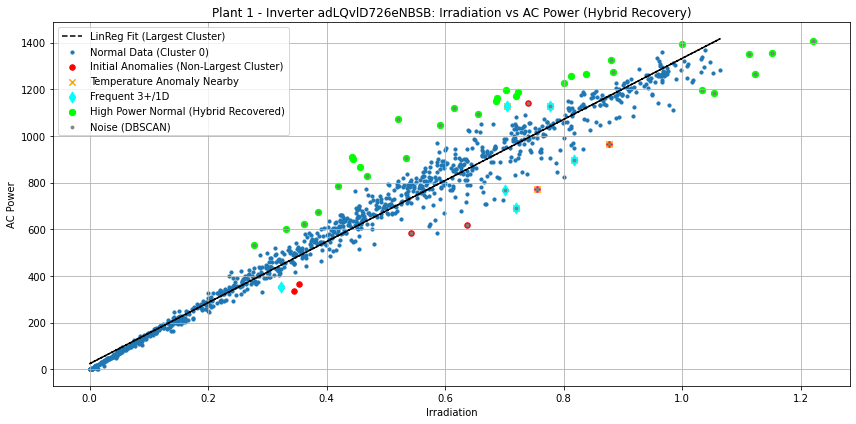

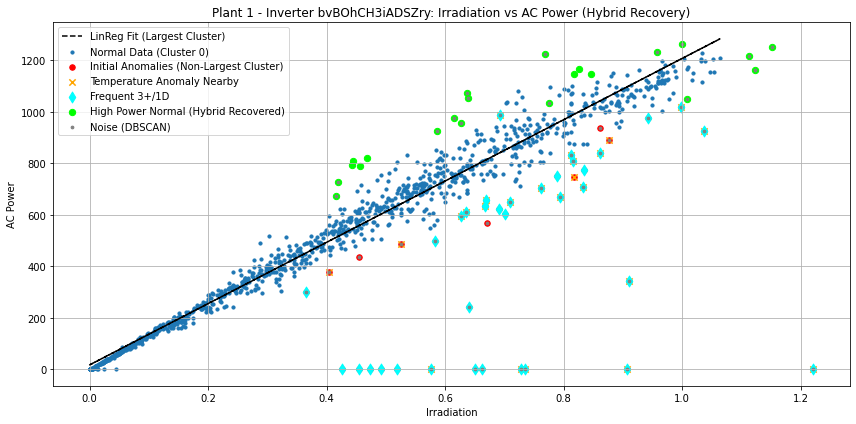

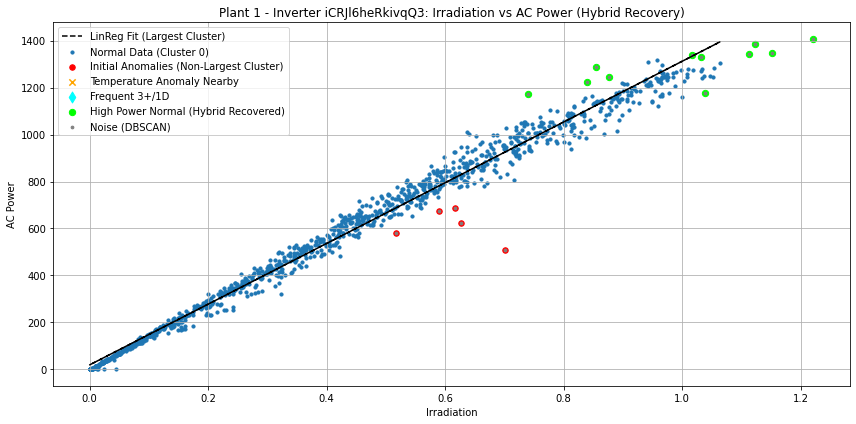

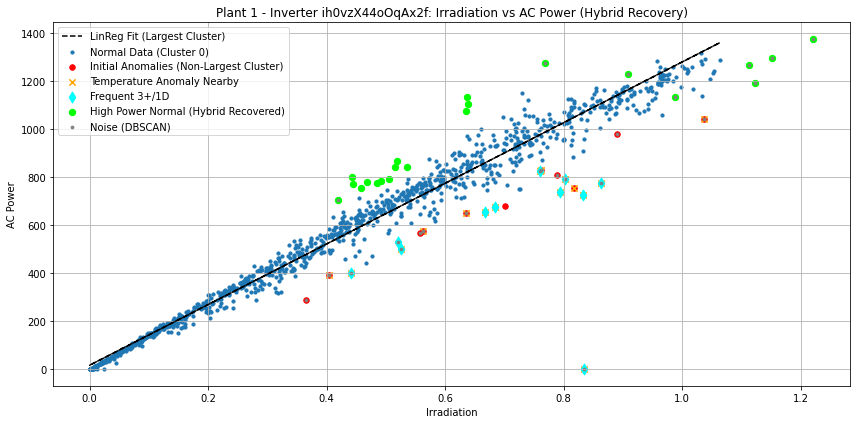

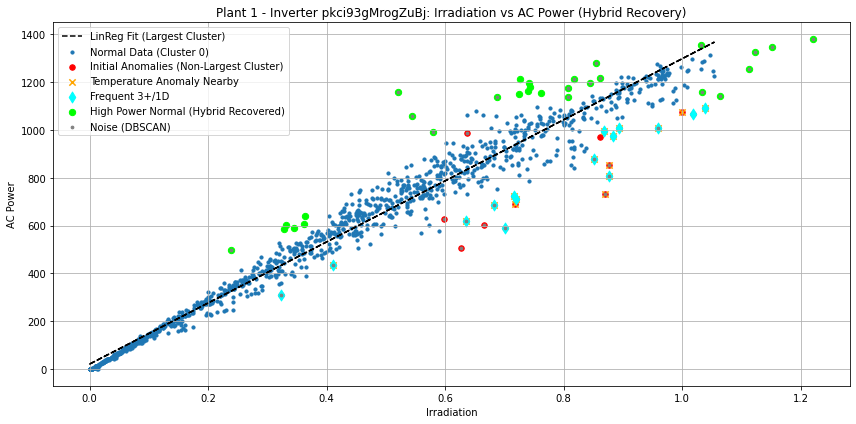

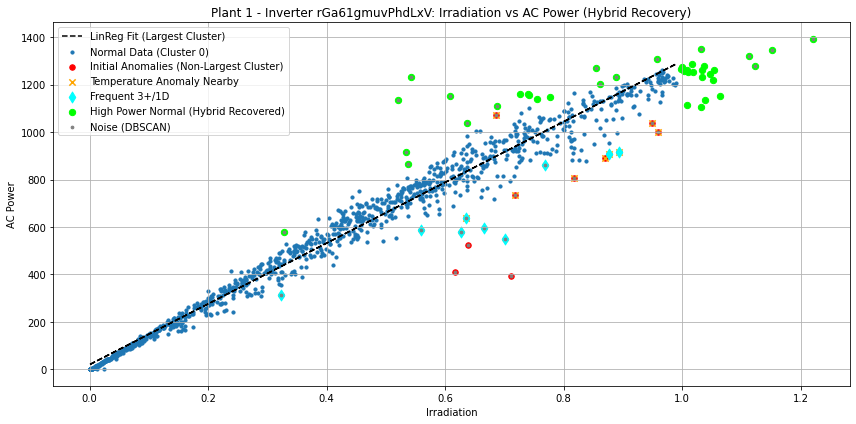

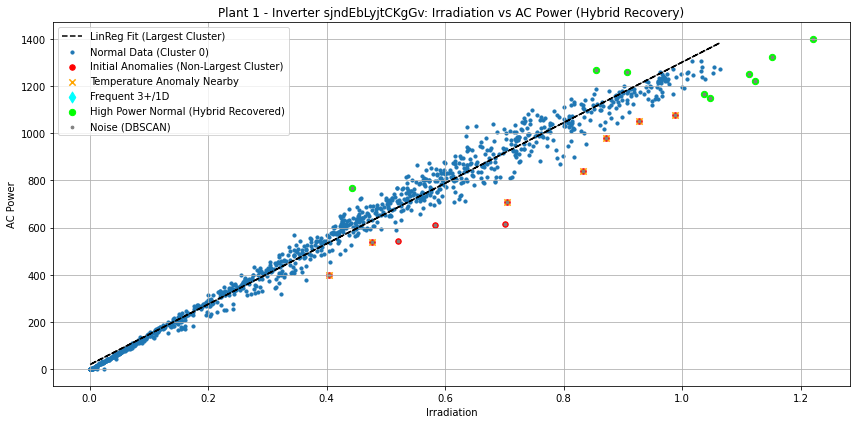

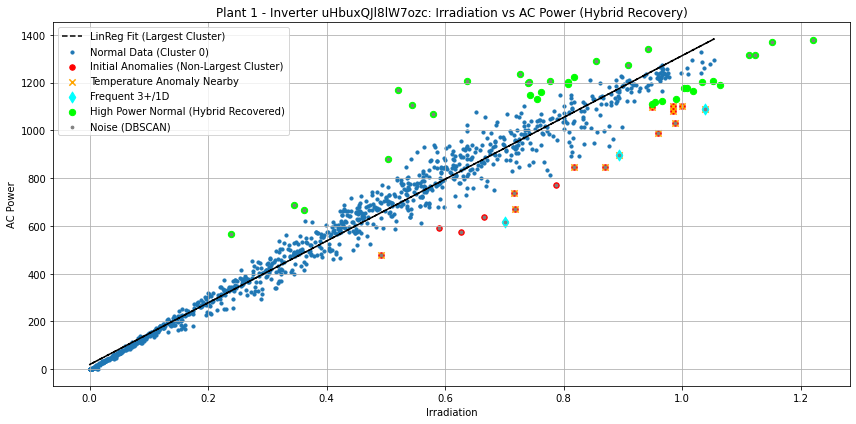

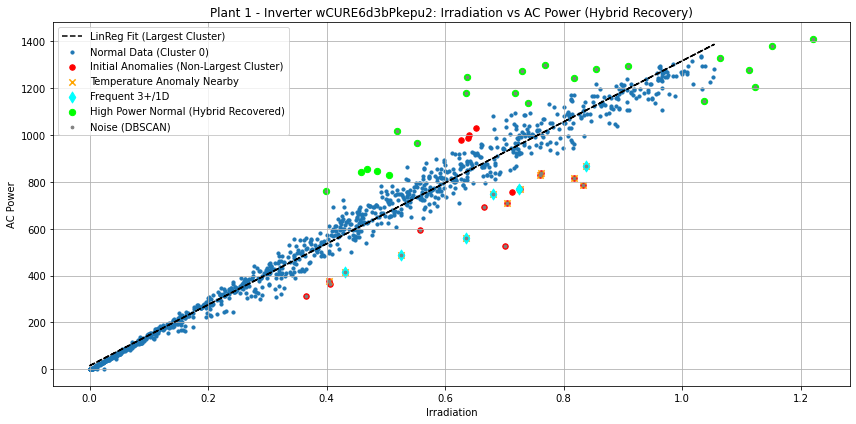

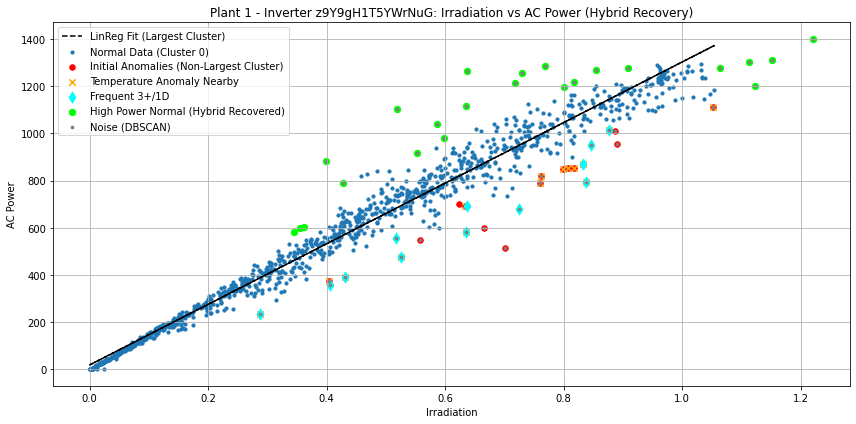

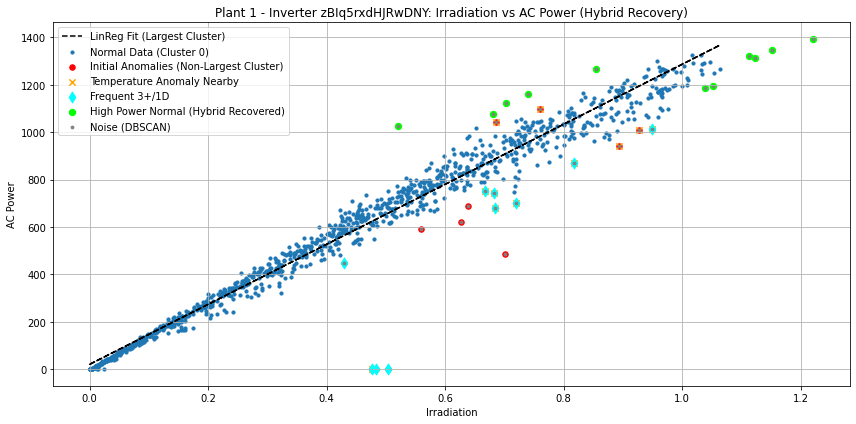

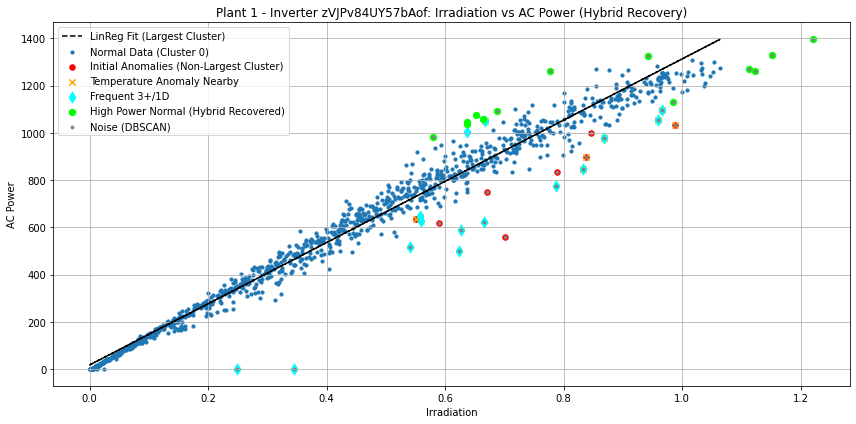


Plant 1: 結合線性回歸和標準差恢復的擴展修改後 DBSCAN 異常檢測完成。
Plant 1: 初始非最大簇異常點數量: 473
Plant 1: 基於混合方法恢復為正常的點數量: 475
Plant 1: 附近有溫度異常的點數量: 270
Plant 1: 頻繁異常點數量 (每天至少 3 個點): 5542
Plant 1: 標記為 '需要關注的異常' 的點數量: 5659


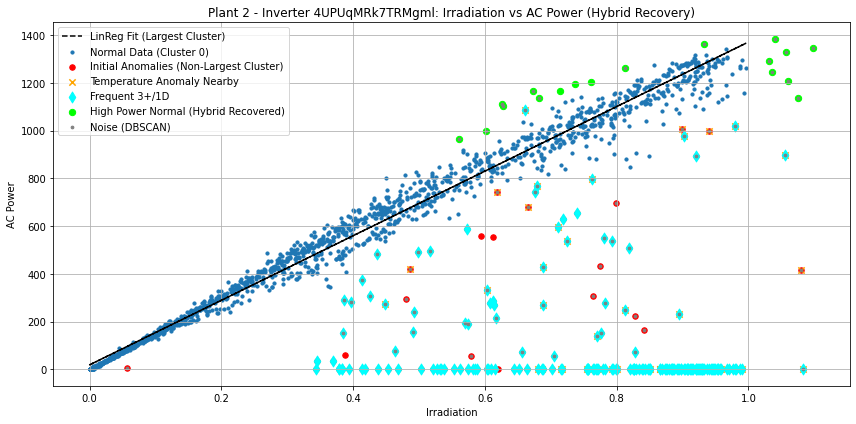

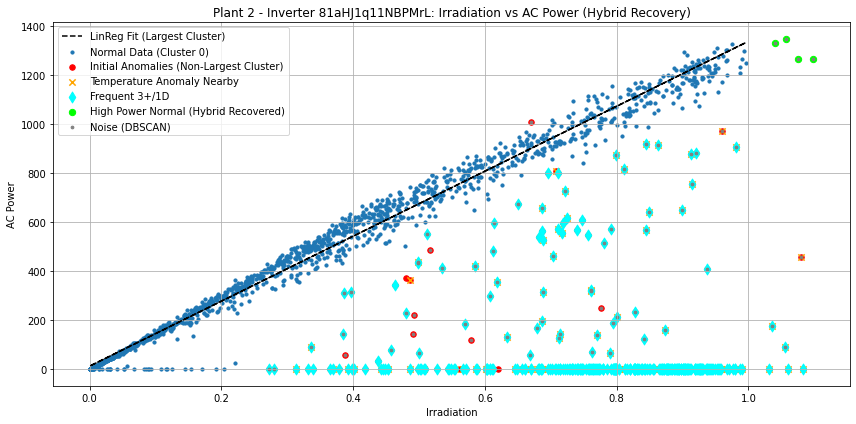

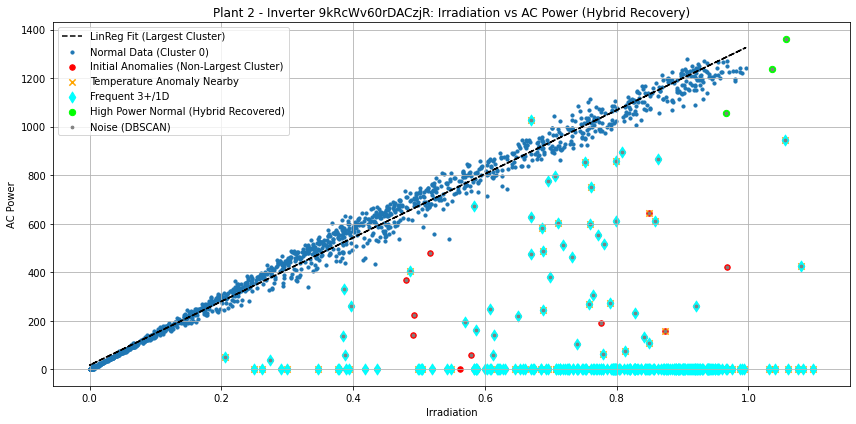

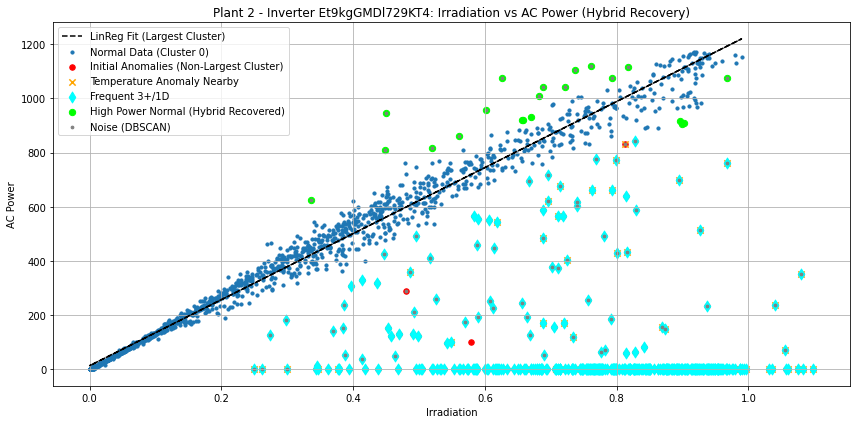

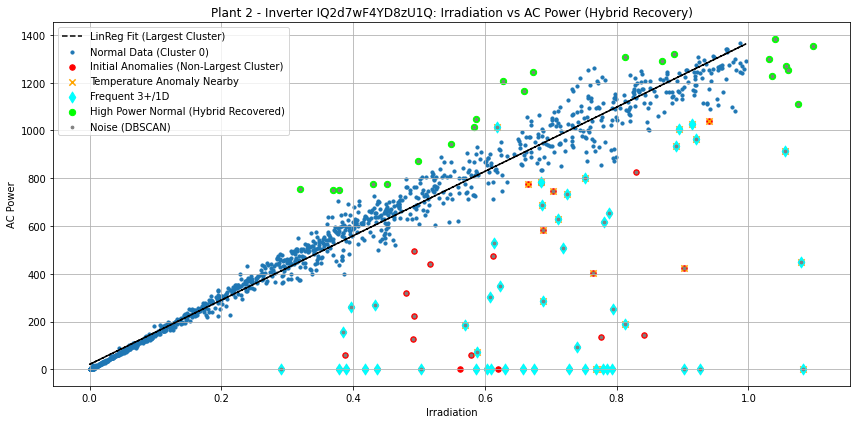

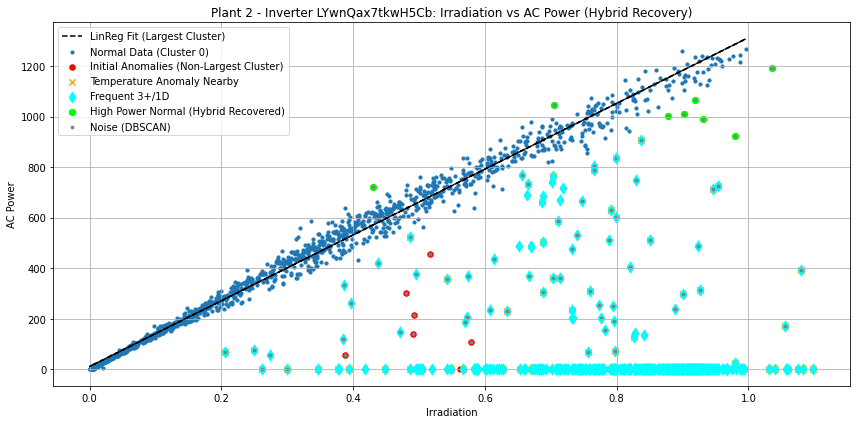

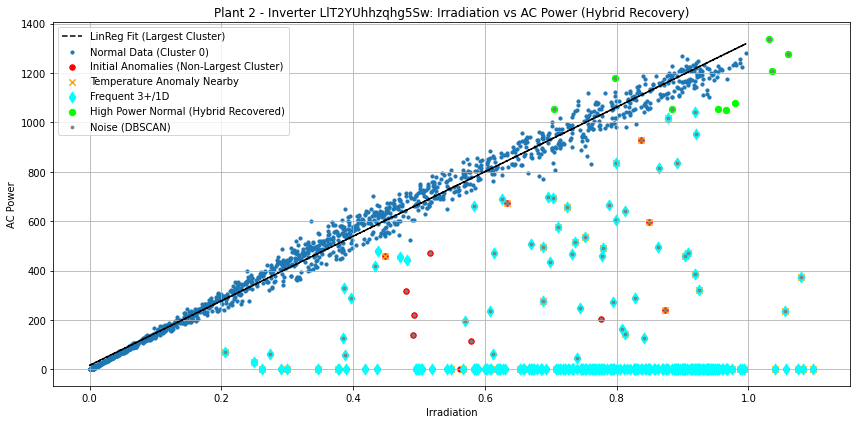

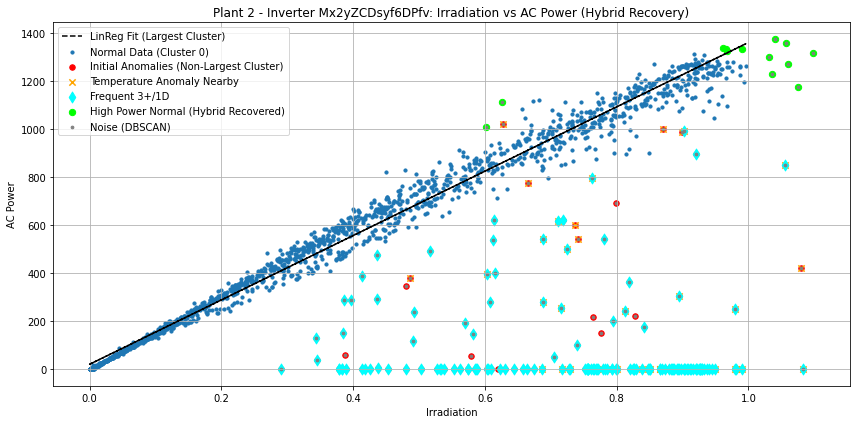

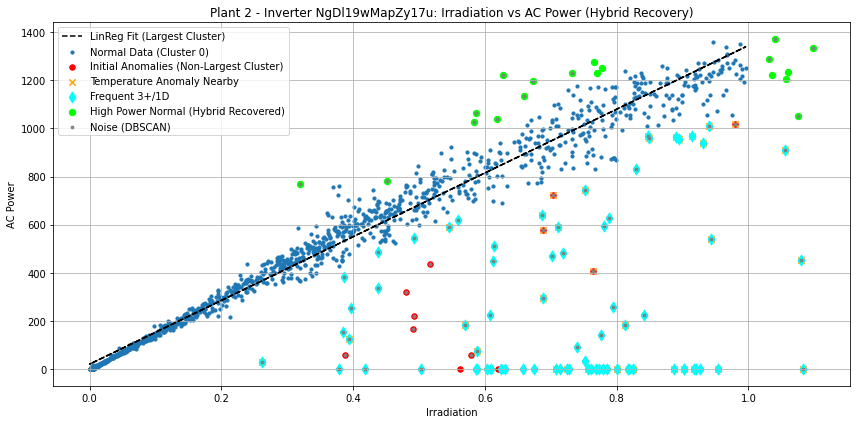

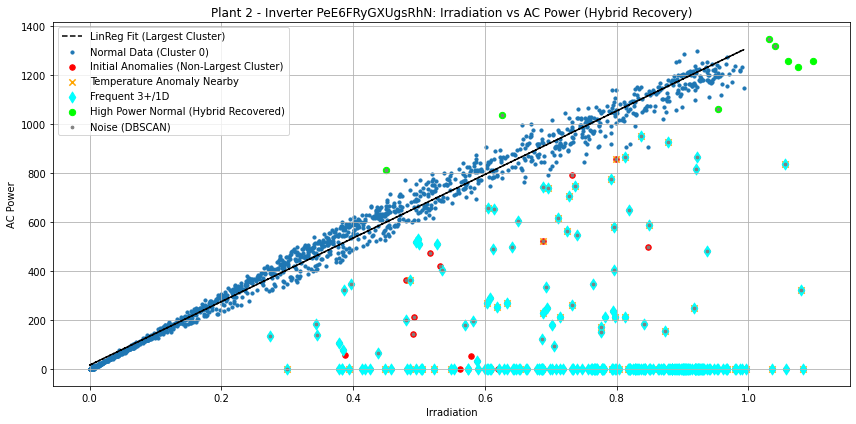

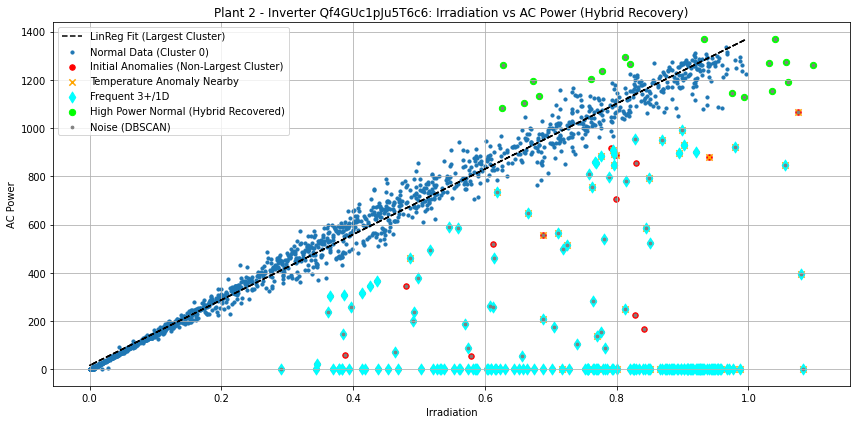

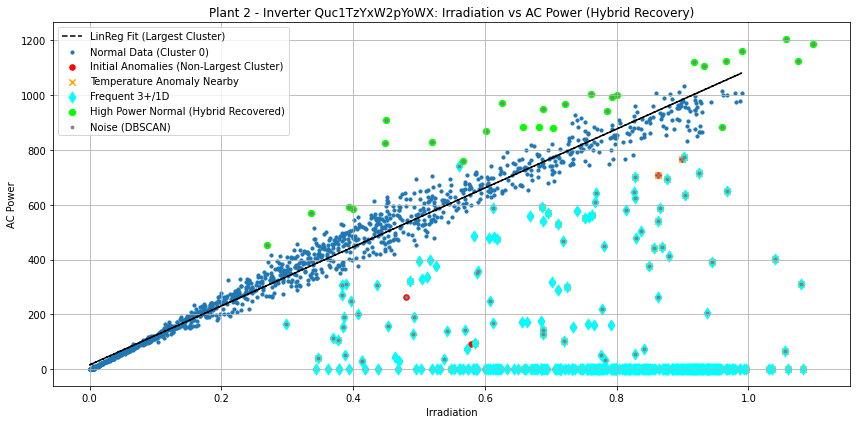

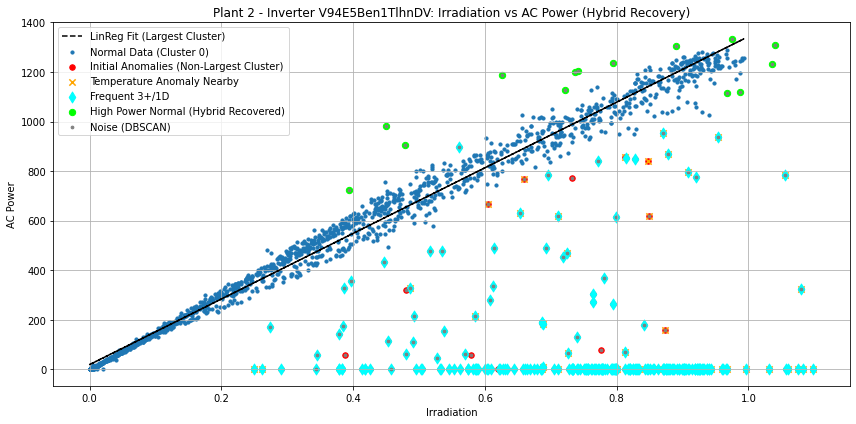

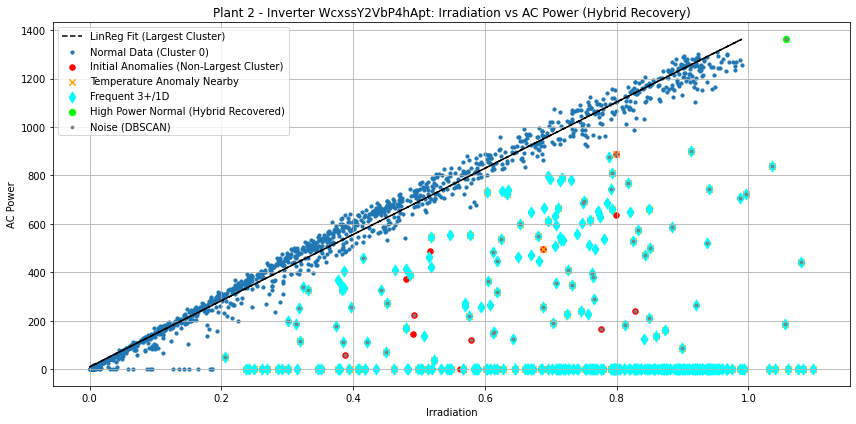

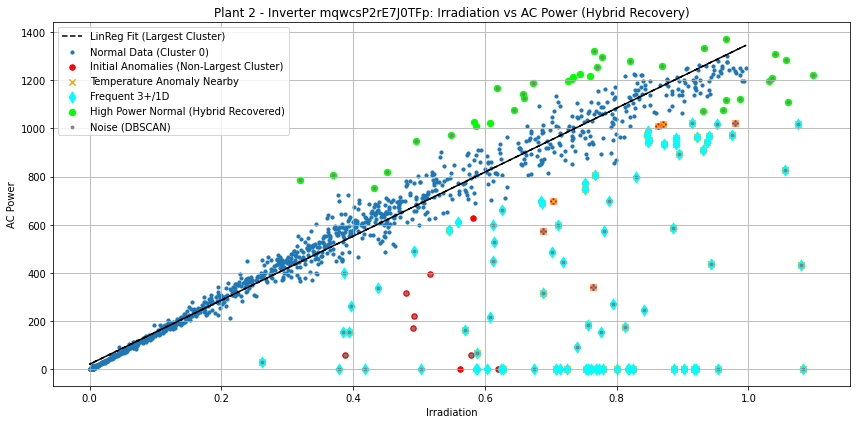

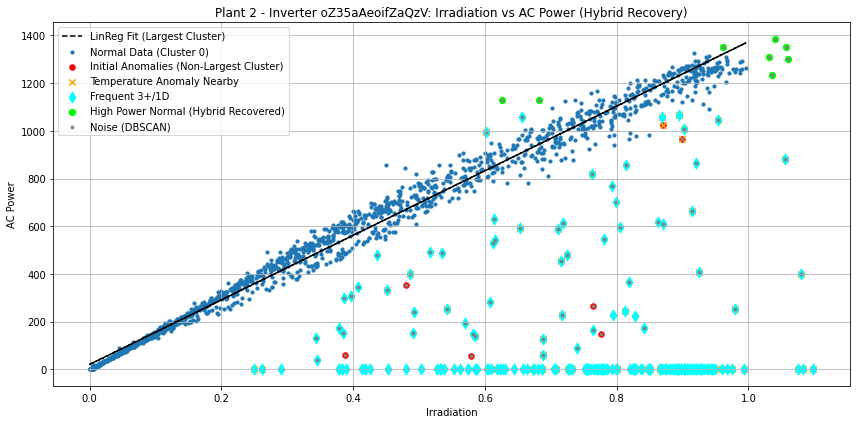

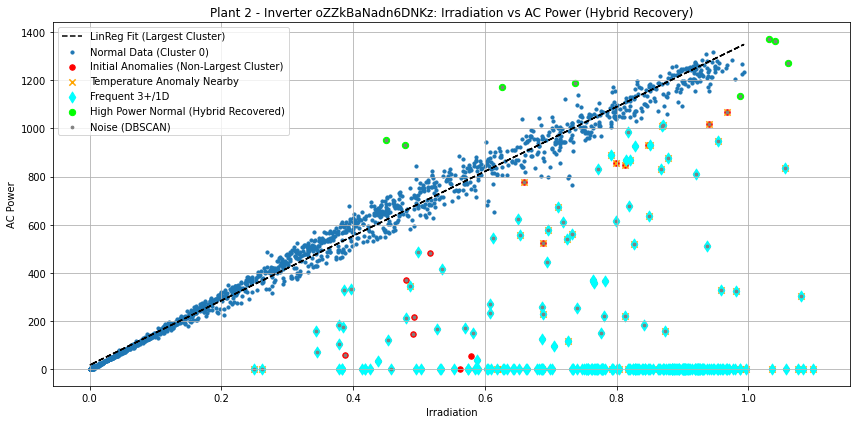

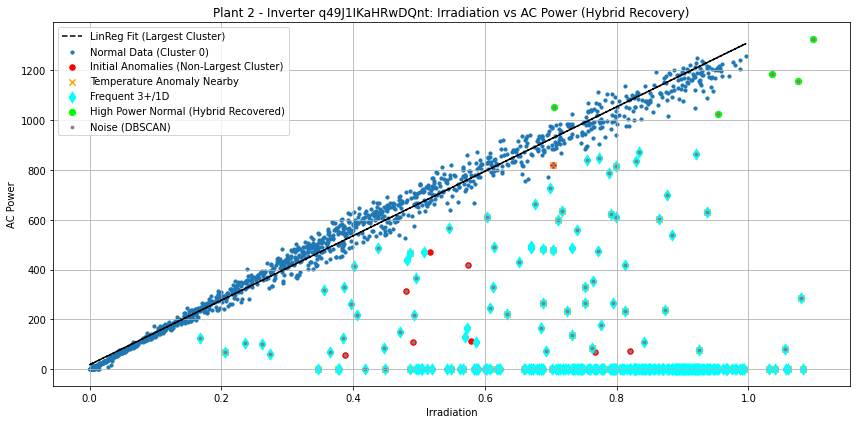

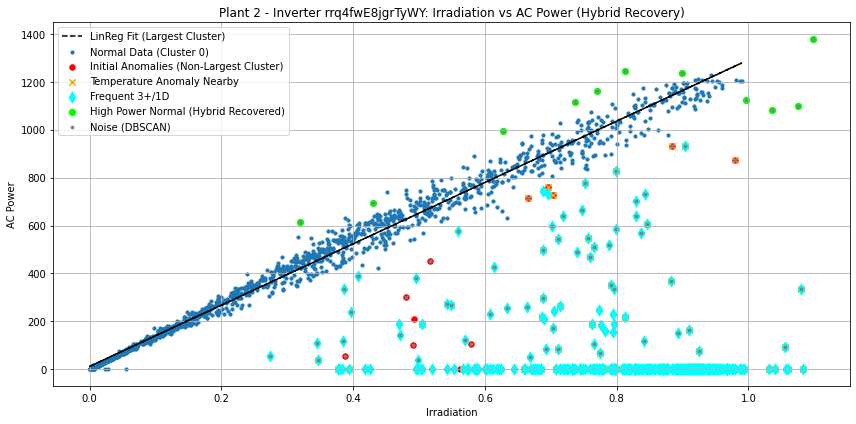

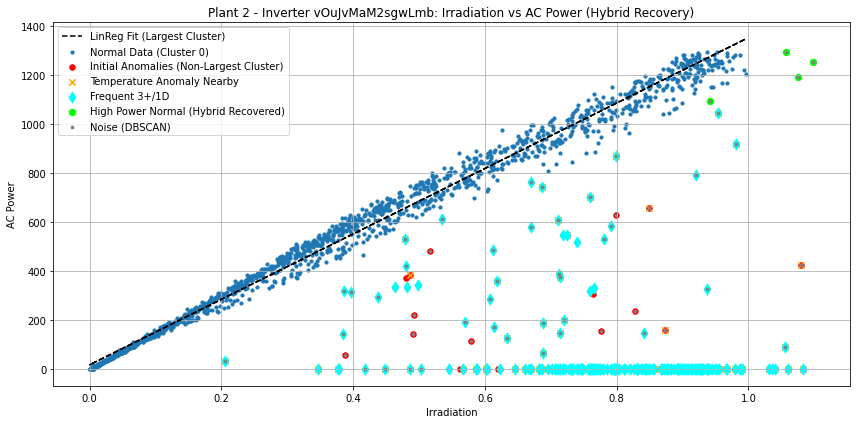

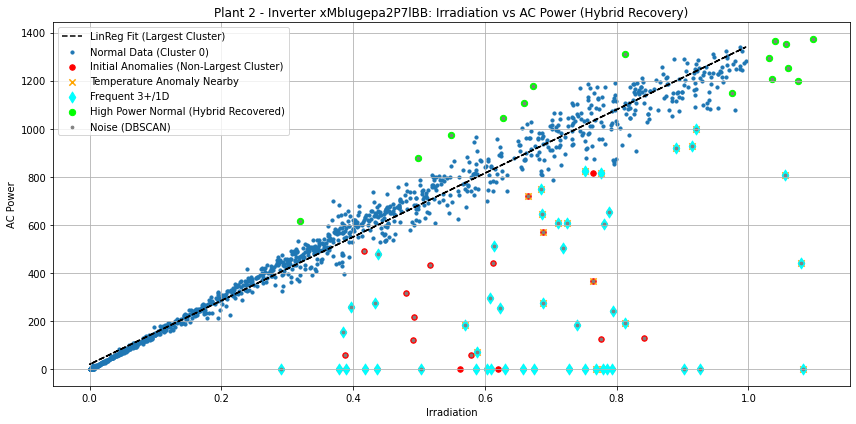

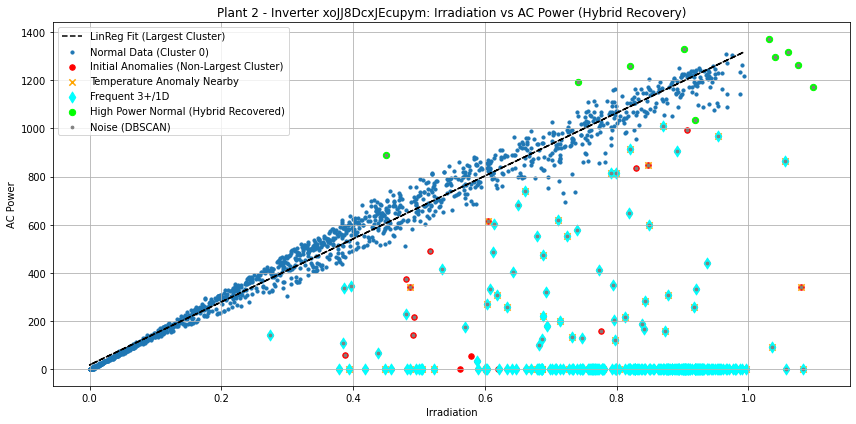


Plant 2: 結合線性回歸和標準差恢復的擴展修改後 DBSCAN 異常檢測完成。
Plant 2: 初始非最大簇異常點數量: 5304
Plant 2: 基於混合方法恢復為正常的點數量: 282
Plant 2: 附近有溫度異常的點數量: 2653
Plant 2: 頻繁異常點數量 (每天至少 3 個點): 38771
Plant 2: 標記為 '需要關注的異常' 的點數量: 38855

Plant 1 結合線性回歸和標準差恢復的擴展修改後 DBSCAN 異常檢測結果前幾行:
             DATE_TIME     INVERTER_KEY  IRRADIATION  AC_POWER  \
0  2020-05-15 00:00:00  1BY6WEcLGh8j5v7          0.0       0.0   
21 2020-05-15 00:15:00  1BY6WEcLGh8j5v7          0.0       0.0   
42 2020-05-15 00:30:00  1BY6WEcLGh8j5v7          0.0       0.0   
63 2020-05-15 00:45:00  1BY6WEcLGh8j5v7          0.0       0.0   
84 2020-05-15 01:00:00  1BY6WEcLGh8j5v7          0.0       0.0   

    is_initial_anomaly_dbscan_modified  is_hybrid_normal  temp_anomaly_around  \
0                                False             False                False   
21                               False             False                False   
42                               False             False                False   
63                               F

In [12]:
# Set the folder path
folder_path = 'ECE657_dataset'

# Read generation and sensor data for Plant 1 and Plant 2
generation_file_plant1 = 'Plant_1_Generation_Data.csv'
sensor_file_plant1 = 'Plant_1_Weather_Sensor_Data.csv'
generation_file_plant2 = 'Plant_2_Generation_Data.csv'
sensor_file_plant2 = 'Plant_2_Weather_Sensor_Data.csv'

generation_path_plant1 = os.path.join(folder_path, generation_file_plant1)
sensor_path_plant1 = os.path.join(folder_path, sensor_file_plant1)
generation_path_plant2 = os.path.join(folder_path, generation_file_plant2)
sensor_path_plant2 = os.path.join(folder_path, sensor_file_plant2)

try:
    plant_1_gen = pd.read_csv(generation_path_plant1)
    plant_1_sen = pd.read_csv(sensor_path_plant1)
    print("Successfully loaded Plant 1 data.")
except FileNotFoundError:
    print("Could not find Plant 1 data files.")
    exit()

try:
    plant_2_gen = pd.read_csv(generation_path_plant2)
    plant_2_sen = pd.read_csv(sensor_path_plant2)
    print("Successfully loaded Plant 2 data.")
except FileNotFoundError:
    print("Could not find Plant 2 data files.")
    exit()

# Preprocess timestamps
plant_1_gen['DATE_TIME'] = pd.to_datetime(plant_1_gen['DATE_TIME'])
plant_1_sen['DATE_TIME'] = pd.to_datetime(plant_1_sen['DATE_TIME'])
plant_2_gen['DATE_TIME'] = pd.to_datetime(plant_2_gen['DATE_TIME'])
plant_2_sen['DATE_TIME'] = pd.to_datetime(plant_2_sen['DATE_TIME'])

# Merge Plant 1 data
merged_plant1 = pd.merge(plant_1_gen, plant_1_sen, on=['DATE_TIME', 'PLANT_ID'], how='inner')
merged_plant1 = merged_plant1.rename(columns={'SOURCE_KEY_x': 'INVERTER_KEY', 'SOURCE_KEY_y': 'WEATHER_KEY'})
merged_plant1 = merged_plant1.sort_values(by=['INVERTER_KEY', 'DATE_TIME'])

# Merge Plant 2 data
merged_plant2 = pd.merge(plant_2_gen, plant_2_sen, on=['DATE_TIME', 'PLANT_ID'], how='inner')
merged_plant2 = merged_plant2.rename(columns={'SOURCE_KEY_x': 'INVERTER_KEY', 'SOURCE_KEY_y': 'WEATHER_KEY'})
merged_plant2 = merged_plant2.sort_values(by=['INVERTER_KEY', 'DATE_TIME'])

# --- Extended Modified DBSCAN Anomaly Detection Function (Frequency Only, Combined with Linear Regression and Std Dev High Power Recovery) ---
def detect_extended_dbscan_anomalies_frequency_hybrid_recovery(df, plant_name, eps=0.1, min_samples=3, temp_threshold_multiplier=2, frequency_window='1D', frequency_threshold=3, linreg_power_threshold_multiplier=1.2, std_power_threshold_multiplier=1.5):
    """
    Performs initial anomaly detection using modified DBSCAN (non-largest cluster), combines temperature and frequency analysis,
    and integrates linear regression and standard deviation thresholds to recover high-power anomalies as normal data.
    """
    df_copy = df.copy()
    df_copy['is_initial_anomaly_dbscan_modified'] = False
    df_copy['temp_anomaly_around'] = False
    df_copy['is_frequent_anomaly'] = False
    df_copy['is_hybrid_normal'] = False # New flag for hybrid method recovered normal points

    # Remove data points where Irradiation is 0
    df_filtered = df_copy[df_copy['IRRADIATION'] > 0].copy()

    if df_filtered.empty:
        print(f"{plant_name}: No data with Irradiation greater than 0, cannot perform anomaly detection.")
        return df_copy

    for inverter_key in df_filtered['INVERTER_KEY'].unique():
        inverter_data = df_filtered[df_filtered['INVERTER_KEY'] == inverter_key].copy()

        # Standardize features using StandardScaler
        scaler = StandardScaler()
        features_scaled = scaler.fit_transform(inverter_data[['IRRADIATION', 'AC_POWER']])

        # Train DBSCAN model
        dbscan = DBSCAN(eps=eps, min_samples=min_samples)
        clusters = dbscan.fit_predict(features_scaled)

        # Find the largest cluster (ignore noise points -1)
        cluster_counts = Counter(c for c in clusters if c != -1)
        if cluster_counts:
            largest_cluster = max(cluster_counts, key=cluster_counts.get)
        else:
            largest_cluster = -2  # If no clusters are formed (other than noise)

        # Mark initial anomalies (not belonging to the largest cluster)
        initial_anomaly_indices = inverter_data[clusters != largest_cluster].index.tolist()
        df_copy.loc[initial_anomaly_indices, 'is_initial_anomaly_dbscan_modified'] = True

        # --- Combine Linear Regression and Standard Deviation to Recover Higher-than-Expected Anomalies as Normal ---
        largest_cluster_data = inverter_data[clusters == largest_cluster]
        if not largest_cluster_data.empty and len(largest_cluster_data['IRRADIATION'].unique()) > 1:
            lin_reg_model = LinearRegression()
            lin_reg_model.fit(largest_cluster_data[['IRRADIATION']], largest_cluster_data['AC_POWER'])
            predicted_power = lin_reg_model.predict(df_copy.loc[initial_anomaly_indices][['IRRADIATION']])
            linreg_recovery_threshold = predicted_power * linreg_power_threshold_multiplier

            mean_ac_power_normal = largest_cluster_data['AC_POWER'].mean()
            std_ac_power_normal = largest_cluster_data['AC_POWER'].std()
            std_recovery_threshold = mean_ac_power_normal + std_power_threshold_multiplier * std_ac_power_normal

            anomaly_data = df_copy.loc[initial_anomaly_indices].copy()
            hybrid_normal_indices = anomaly_data[
                (anomaly_data['AC_POWER'] > linreg_recovery_threshold) |
                (anomaly_data['AC_POWER'] > std_recovery_threshold)
            ].index.tolist()
            df_copy.loc[hybrid_normal_indices, 'is_initial_anomaly_dbscan_modified'] = False
            df_copy.loc[hybrid_normal_indices, 'is_hybrid_normal'] = True

        # --- Temperature Check ---
        temp_data = df_copy[df_copy['INVERTER_KEY'] == inverter_key].set_index('DATE_TIME')
        mean_amb_temp = temp_data['AMBIENT_TEMPERATURE'].mean()
        std_amb_temp = temp_data['AMBIENT_TEMPERATURE'].std()
        mean_mod_temp = temp_data['MODULE_TEMPERATURE'].mean()
        std_mod_temp = temp_data['MODULE_TEMPERATURE'].std()

        anomaly_indices_to_check = df_copy[df_copy['is_initial_anomaly_dbscan_modified'] & (df_copy['INVERTER_KEY'] == inverter_key)].index.tolist()
        for anomaly_index in anomaly_indices_to_check:
            anomaly_time = df_copy.loc[anomaly_index, 'DATE_TIME']
            time_delta = pd.Timedelta('1H')  # Check 1 hour before and after
            start_time = anomaly_time - time_delta
            end_time = anomaly_time + time_delta
            temp_around_anomaly = temp_data.loc[start_time:end_time]

            amb_temp_anom = temp_around_anomaly[
                (temp_around_anomaly['AMBIENT_TEMPERATURE'] > mean_amb_temp + temp_threshold_multiplier * std_amb_temp) |
                (temp_around_anomaly['AMBIENT_TEMPERATURE'] < mean_amb_temp - temp_threshold_multiplier * std_amb_temp)
            ].index.tolist()
            mod_temp_anom = temp_around_anomaly[
                (temp_around_anomaly['MODULE_TEMPERATURE'] > mean_mod_temp + temp_threshold_multiplier * std_mod_temp) |
                (temp_around_anomaly['MODULE_TEMPERATURE'] < mean_mod_temp - temp_threshold_multiplier * std_mod_temp)
            ].index.tolist()

            if amb_temp_anom or mod_temp_anom:
                df_copy.loc[anomaly_index, 'temp_anomaly_around'] = True

        # --- Frequency Analysis ---
        frequent_anomalies = []
        df_copy['date'] = df_copy['DATE_TIME'].dt.date
        anomaly_counts_per_day = df_copy[df_copy['is_initial_anomaly_dbscan_modified'] & (df_copy['INVERTER_KEY'] == inverter_key)].groupby('date').size()
        frequent_anomaly_dates = anomaly_counts_per_day[anomaly_counts_per_day >= frequency_threshold].index.tolist()
        frequent_anomaly_indices = df_copy[(df_copy['date'].isin(frequent_anomaly_dates)) & (df_copy['INVERTER_KEY'] == inverter_key)].index.tolist()
        df_copy.loc[frequent_anomaly_indices, 'is_frequent_anomaly'] = True
        frequent_anomalies.extend(frequent_anomaly_indices)
        df_copy.drop(columns=['date'], inplace=True)

        # Visualize results for each Inverter
        plt.figure(figsize=(12, 6))
        normal_data = inverter_data[clusters == largest_cluster]
        initial_anomaly_data = inverter_data[inverter_data.index.isin(df_copy[df_copy['is_initial_anomaly_dbscan_modified'] & (df_copy['INVERTER_KEY'] == inverter_key)].index)]
        temp_anomaly_data = inverter_data[inverter_data.index.isin([idx for idx in df_copy[df_copy['is_initial_anomaly_dbscan_modified'] & (df_copy['INVERTER_KEY'] == inverter_key)].index if df_copy.loc[idx, 'temp_anomaly_around']])
]
        frequent_anomaly_data = inverter_data[inverter_data.index.isin([idx for idx in df_copy[df_copy['is_initial_anomaly_dbscan_modified'] & (df_copy['INVERTER_KEY'] == inverter_key)].index if df_copy.loc[idx, 'is_frequent_anomaly']])
]
        hybrid_normal_data = inverter_data[inverter_data.index.isin(df_copy[df_copy['is_hybrid_normal'] & (df_copy['INVERTER_KEY'] == inverter_key)].index)]
        noise_data = inverter_data[clusters == -1]

        plt.scatter(normal_data['IRRADIATION'], normal_data['AC_POWER'], label=f'Normal Data (Cluster {largest_cluster})', s=10)
        plt.scatter(initial_anomaly_data['IRRADIATION'], initial_anomaly_data['AC_POWER'], color='red', label='Initial Anomalies (Non-Largest Cluster)', s=30)
        plt.scatter(temp_anomaly_data['IRRADIATION'], temp_anomaly_data['AC_POWER'], color='orange', label='Temperature Anomaly Nearby', s=40, marker='x')
        plt.scatter(frequent_anomaly_data['IRRADIATION'], frequent_anomaly_data['AC_POWER'], color='cyan', label=f'Frequent {frequency_threshold}+/{frequency_window}', s=60, marker='d')
        plt.scatter(hybrid_normal_data['IRRADIATION'], hybrid_normal_data['AC_POWER'], color='lime', label='High Power Normal (Hybrid Recovered)', s=40, marker='o')
        plt.scatter(noise_data['IRRADIATION'], noise_data['AC_POWER'], color='gray', label='Noise (DBSCAN)', s=30, marker='.')

        if not largest_cluster_data.empty and len(largest_cluster_data['IRRADIATION'].unique()) > 1:
            lin_reg_model = LinearRegression()
            lin_reg_model.fit(largest_cluster_data[['IRRADIATION']], largest_cluster_data['AC_POWER'])
            plt.plot(largest_cluster_data['IRRADIATION'], lin_reg_model.predict(largest_cluster_data[['IRRADIATION']]), color='black', linestyle='--', label='LinReg Fit (Largest Cluster)')

        plt.title(f'{plant_name} - Inverter {inverter_key}: Irradiation vs AC Power (Hybrid Recovery)')
        plt.xlabel('Irradiation')
        plt.ylabel('AC Power')
        plt.legend()
        plt.grid(True)
        plt.tight_layout()
        plt.show()

    print(f"\n{plant_name}: Extended modified DBSCAN anomaly detection with hybrid recovery completed.")
    print(f"{plant_name}: Number of initial non-largest cluster anomalies: {df_copy['is_initial_anomaly_dbscan_modified'].sum()}")
    print(f"{plant_name}: Number of points recovered as normal via hybrid method: {df_copy['is_hybrid_normal'].sum()}")
    print(f"{plant_name}: Number of points with temperature anomalies nearby: {df_copy['temp_anomaly_around'].sum()}")
    print(f"{plant_name}: Number of frequent anomalies (at least {frequency_threshold} per {frequency_window}): {df_copy['is_frequent_anomaly'].sum()}")

    df_copy['is_significant_anomaly'] = df_copy['is_frequent_anomaly'] | (df_copy['is_initial_anomaly_dbscan_modified'] & df_copy['temp_anomaly_around'])
    print(f"{plant_name}: Number of points flagged as 'significant anomalies': {df_copy['is_significant_anomaly'].sum()}")

    return df_copy

# Perform extended modified anomaly detection with hybrid recovery for Plant 1 and Plant 2
merged_plant1_extended_dbscan_hybrid = detect_extended_dbscan_anomalies_frequency_hybrid_recovery(merged_plant1, 'Plant 1', eps=0.1, min_samples=3, temp_threshold_multiplier=2, frequency_window='1D', frequency_threshold=3, linreg_power_threshold_multiplier=1.2, std_power_threshold_multiplier=1.5)
merged_plant2_extended_dbscan_hybrid = detect_extended_dbscan_anomalies_frequency_hybrid_recovery(merged_plant2, 'Plant 2', eps=0.1, min_samples=3, temp_threshold_multiplier=2, frequency_window='1D', frequency_threshold=3, linreg_power_threshold_multiplier=1.2, std_power_threshold_multiplier=1.5)

# You can now view the new anomaly flag columns in the resulting DataFrames
print("\nFirst few rows of Plant 1 results with extended modified DBSCAN and hybrid recovery:")
print(merged_plant1_extended_dbscan_hybrid[['DATE_TIME', 'INVERTER_KEY', 'IRRADIATION', 'AC_POWER', 'is_initial_anomaly_dbscan_modified', 'is_hybrid_normal', 'temp_anomaly_around', 'is_frequent_anomaly', 'is_significant_anomaly']].head())

print("\nFirst few rows of Plant 2 results with extended modified DBSCAN and hybrid recovery:")
print(merged_plant2_extended_dbscan_hybrid[['DATE_TIME', 'INVERTER_KEY', 'IRRADIATION', 'AC_POWER', 'is_initial_anomaly_dbscan_modified', 'is_hybrid_normal', 'temp_anomaly_around', 'is_frequent_anomaly', 'is_significant_anomaly']].head())